In [1]:
import pandas as pd
import numpy as np
import csv, os
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from collections import Counter


from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils, plot_model

from PIL import Image
import json, codecs
import warnings
warnings.filterwarnings("ignore")


In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Input,Dropout,BatchNormalization,Flatten,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical,plot_model

In [3]:
#LOADING DATA
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
x_train = train.iloc[:,1:]
y_train = train['label']

In [5]:
x_test = test.iloc[:,1:]
y_test = test['label']

In [32]:
print("Input training dataset shape:", x_train.shape)
print("Output training dataset shape:", y_train.shape)
print("Input test dataset shape:", x_test.shape)
print("Output test dataset shape:", y_test.shape)

Input training dataset shape: (60000, 28, 28, 1)
Output training dataset shape: (60000,)
Input test dataset shape: (10000, 28, 28, 1)
Output test dataset shape: (10000,)


In [6]:
#Create a "mapping"
mapping = {0:"T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

Text(0.5, 1.0, 'Distribution of Target Class')

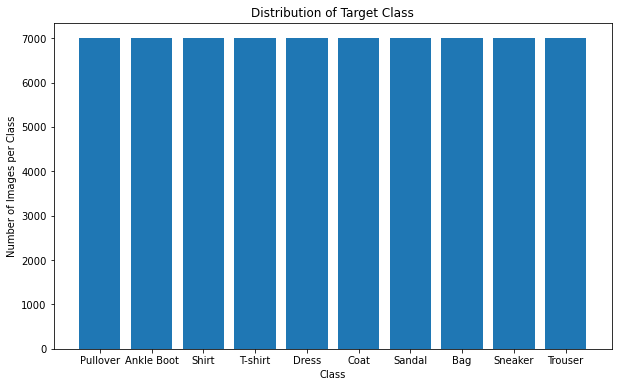

In [7]:
#check the distribution of target classes in the fashion datasets
y= pd.Series(np.concatenate((y_train, y_test)))
plt.figure(figsize=(10,6))
plt.bar(x=[mapping[x] for x in y.value_counts().index], height= y.value_counts());
plt.xlabel("Class")
plt.ylabel("Number of Images per Class")
plt.title("Distribution of Target Class")

### It appears that the class labels are evenly distributed in the fashion dataset. 

## Pre Processing for neural network

In [8]:
x_train = x_train.values.reshape(60000,28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

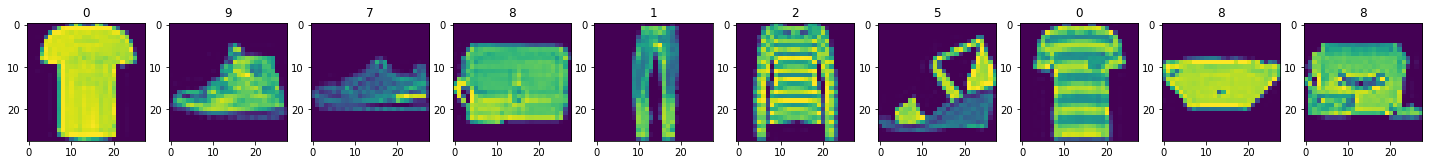

In [30]:
fig,ax = plt.subplots(1,10,figsize = (25,10))
for i in range(10):
    rand_index = np.random.randint(len(x_train))
    ax[i].imshow(x_train[rand_index])
    ax[i].set_title(y_train[rand_index])

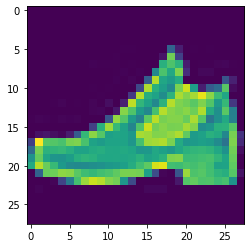

In [10]:
plt.imshow(x_train[1].reshape(28, 28))

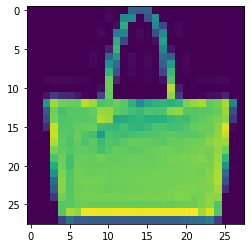

In [11]:
# visualize a random image
plt.imshow(x_train[2000].reshape(28, 28))

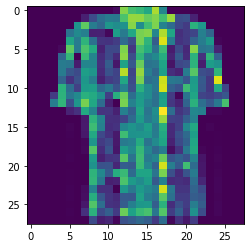

In [12]:
# visualize a random image
plt.imshow(x_train[2020].reshape(28, 28))

## Pre Processing target variables

In [13]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## Function to evaluate model performance

In [14]:
def plot_function(history):
    fig,ax = plt.subplots(1,2,figsize = (25,5))
    ax[0].plot(history.history['loss'],color = 'red',label = 'train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'],color = 'green',label = 'val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'],color = 'orange',label = 'train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'],color = 'black',label = 'val_accuarcy')
    ax[1].legend()

# Neural Net

In [15]:
inputs = Input(shape = (28,28,1))
x = Conv2D(32,2,activation = 'relu',strides = 2,padding = 'same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)
    
x = Conv2D(64,2,activation = 'relu',strides = 2,padding = 'same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)
    
x = Conv2D(128,2,activation = 'relu',strides = 2,padding = 'same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)
    
x = Conv2D(256,2,activation = 'relu',strides = 2,padding = 'same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)
    
x = Conv2D(512,2,activation = 'relu',strides = 2,padding = 'same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)


x = Conv2D(1024,2,activation = 'relu',strides = 2,padding = 'same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.2)(x)
    
x = Flatten()(x)
x = Dense(32,activation = 'relu')(x)
x = Dense(64,activation = 'relu')(x)
x = Dense(128,activation = 'relu')(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 1024)      5120      
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 1024)     4096      
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 1024)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 50176)             0     

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'nadam',metrics = ['accuracy'])

In [15]:
%%time 
history1 = model.fit(x_train,Y_train,batch_size = 128,epochs = 10,validation_data = (x_test,Y_test))

Epoch 1/10
469/469 [==============================] - 504s 1s/step - loss: 0.5273 - accuracy: 0.8179 - val_loss: 0.4260 - val_accuracy: 0.8410
Epoch 2/10
469/469 [==============================] - 488s 1s/step - loss: 0.3695 - accuracy: 0.8696 - val_loss: 0.3741 - val_accuracy: 0.8678
Epoch 3/10
469/469 [==============================] - 489s 1s/step - loss: 0.3363 - accuracy: 0.8813 - val_loss: 0.3527 - val_accuracy: 0.8743
Epoch 4/10
469/469 [==============================] - 486s 1s/step - loss: 0.3128 - accuracy: 0.8867 - val_loss: 0.3859 - val_accuracy: 0.8587
Epoch 5/10
469/469 [==============================] - 477s 1s/step - loss: 0.2980 - accuracy: 0.8922 - val_loss: 0.3399 - val_accuracy: 0.8820
Epoch 6/10
469/469 [==============================] - 478s 1s/step - loss: 0.2906 - accuracy: 0.8945 - val_loss: 0.3606 - val_accuracy: 0.8759
Epoch 7/10
469/469 [==============================] - 478s 1s/step - loss: 0.2767 - accuracy: 0.9007 - val_loss: 0.3183 - val_accuracy: 0.8924

In [16]:
%% time
model.evaluate(x_test,Y_test)

313/313 [==============================] - 15s 47ms/step - loss: 0.3285 - accuracy: 0.8868


[0.32846179604530334, 0.8867999911308289]

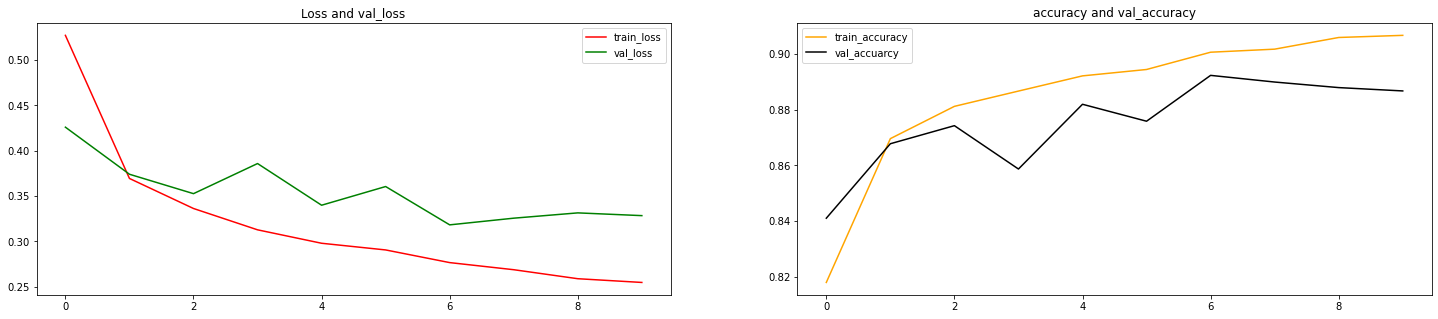

In [17]:
plot_function(history1)

## Using Modular Code for Fast Peformance

- Customize a "Callback" construct to perform actions such as: early stopping, periodically saving the model (robust against unexpected failure) from the tensorflow utilities Keras model during training, evaluation, or inference. https://www.tensorflow.org/guide/keras/custom_callback

In [17]:
# create a Class for Callback
class myCallback(tf.keras.callbacks.Callback):
    #desired Accuracy  can be passed on while creating an instance of the class (with _init_ function)
    def __init__(self, acc_threshold=0.92, print_msg=True):  #we set target at 90%
        self.acc_threshold = acc_threshold
        self.print_msg = print_msg
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>self.acc_threshold):
            if self.print_msg:
                print("\nReach target accuracy so cancelling the training!")
            self.model.stop_training = True
        else:
            if self.print_msg:
                print("\nAccuracy not high enough. Starting another epoch ...\n")

In [18]:
#build a densely connected neural network model using different activation functions and number of hidden layers
#architecture: Architecture of the hidden layers (densely connected)
def build_model(num_layers=1, architecture=[32], act_func='relu', 
               input_shape=(28,28), output_class=10):
    layers = [tf.keras.layers.Flatten(input_shape=input_shape)]
    if act_func == 'relu':
        activation = tf.nn.relu
    if act_func == 'sigmoid':
        activation = tf.nn.sigmoid        
    if act_func == 'tanh':
        activation = tf.nn.tanh
        
    #any number of hidden layers with arbitray number of neurons or choice of activation function
    for i in range(num_layers):
        layers.append(tf.keras.layers.Dense(architecture[i], activation=tf.nn.relu))
    layers.append(tf.keras.layers.Dense(output_class, activation=tf.nn.softmax))
        

In [19]:
def compile_train_model(model, x_train, y_train, callbacks=None, 
                       learning_rate=0.001, batch_size=1, epochs=10, verbose=0):
    model_copy = model   #create a copy of a model to work on it when modifying instead of the original one
    model_copy.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    model_copy.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callbacks], verbose=verbose)
    return model_copy

In [20]:
from itertools import product
accuracy_desired = [0.85,0.9,0.95]
num_neurons = [16,32,64,128]
cases = list(product(accuracy_desired,num_neurons))
print("So, the cases we are considering are as follows...\n")
for i,c in enumerate(cases):
    print("Accuracy target {}, number of neurons: {}".format(c[0],c[1]))
    if (i+1)%4 == 0 and (i+1)!= len(cases):
        print("-"*50)

So, the cases we are considering are as follows...

Accuracy target 0.85, number of neurons: 16
Accuracy target 0.85, number of neurons: 32
Accuracy target 0.85, number of neurons: 64
Accuracy target 0.85, number of neurons: 128
--------------------------------------------------
Accuracy target 0.9, number of neurons: 16
Accuracy target 0.9, number of neurons: 32
Accuracy target 0.9, number of neurons: 64
Accuracy target 0.9, number of neurons: 128
--------------------------------------------------
Accuracy target 0.95, number of neurons: 16
Accuracy target 0.95, number of neurons: 32
Accuracy target 0.95, number of neurons: 64
Accuracy target 0.95, number of neurons: 128


In [21]:
#Plot the loss and accuracy over epochs
def plot_loss_acc(model, target_acc=0.9, title=None):
    e=np.array(model.history.epcho)+1  #add 1 to the list of epochs which is zero index
    l=np.array(model.history.history['loss'])
    a=np.array(model.history.history['acc'])
    
    fig, ax1 = plt.subplots()
    
    color = 'tab:red'
    ax1.set_xlabel('Epochs', fontsize=15)
    ax1.set_ylabel('Loss', color=color, fontsize=15)
    ax1.plot(e, l, color=color, lw=2)
    

In [29]:
# for c in cases:
#     callbacks = myCallback(c[0], print_msg=False)
#     model = build_model(num_layers=1,architecture=[c[1]])
#     model = compile_train_model(model, x_train,y_train,callbacks=callbacks, batch_size=32,epochs=30)
    
#     title = "Loss and accuracy over the epochs for\naccuracy threshold \
#     {} and number of neurons {}".format(c[0],c[1])
#     plot_loss_acc(model,target_acc=c[0],title=title)

# New improved-Network

In [26]:
import pydot

In [28]:
left_inputs = Input(shape = (28,28,1))
x = left_inputs
x = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.27)(x)

x = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.27)(x)

x = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Conv2D(filters = 128,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.27)(x)

x = Conv2D(filters = 256,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(x)

right_inputs = Input(shape = (28,28,1))
y = right_inputs
y = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Dropout(0.27)(y)

y = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Dropout(0.27)(y)

y = Conv2D(filters = 64,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Dropout(0.3)(y)

y = Conv2D(filters = 128,kernel_size = 2,padding = 'same',strides = 1,dilation_rate = 3,activation = 'relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Dropout(0.27)(y)
y = Conv2D(filters = 256,kernel_size = 2,padding = 'same',strides = 1,activation = 'relu')(y)

y = concatenate([x,y])
y = Flatten()(y)
y = Dropout(0.27)(y)
y = Dense(20,activation ='relu')(y)
outputs = Dense(10,activation = 'sigmoid')(y)
model1 = Model([left_inputs,right_inputs],outputs)
# plot_model(model1)

In [24]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 64)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   320         ['input_3[0][0]']                
                                                                                            

 conv2d_10 (Conv2D)             (None, 1, 1, 256)    131328      ['dropout_9[0][0]']              
                                                                                                  
 conv2d_15 (Conv2D)             (None, 1, 1, 256)    131328      ['dropout_13[0][0]']             
                                                                                                  
 concatenate (Concatenate)      (None, 1, 1, 512)    0           ['conv2d_10[0][0]',              
                                                                  'conv2d_15[0][0]']              
                                                                                                  
 flatten_2 (Flatten)            (None, 512)          0           ['concatenate[0][0]']            
                                                                                                  
 dropout_14 (Dropout)           (None, 512)          0           ['flatten_2[0][0]']              
          

In [22]:
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [23]:
%%time
history2 = model1.fit([x_train,x_train],Y_train,batch_size = 55,epochs = 20,validation_data = ([x_test,x_test],Y_test))

Epoch 1/20
1091/1091 [==============================] - 429s 388ms/step - loss: 0.6108 - accuracy: 0.7763 - val_loss: 0.3636 - val_accuracy: 0.8651
Epoch 2/20
1091/1091 [==============================] - 420s 385ms/step - loss: 0.4007 - accuracy: 0.8540 - val_loss: 0.2991 - val_accuracy: 0.8909
Epoch 3/20
1091/1091 [==============================] - 410s 376ms/step - loss: 0.3558 - accuracy: 0.8702 - val_loss: 0.2690 - val_accuracy: 0.9001
Epoch 4/20
1091/1091 [==============================] - 411s 377ms/step - loss: 0.3319 - accuracy: 0.8796 - val_loss: 0.2546 - val_accuracy: 0.9052
Epoch 5/20
1091/1091 [==============================] - 410s 376ms/step - loss: 0.3121 - accuracy: 0.8863 - val_loss: 0.2830 - val_accuracy: 0.8956
Epoch 6/20
1091/1091 [==============================] - 411s 376ms/step - loss: 0.3026 - accuracy: 0.8896 - val_loss: 0.2926 - val_accuracy: 0.8879
Epoch 7/20
1091/1091 [==============================] - 413s 379ms/step - loss: 0.2854 - accuracy: 0.8958 - val_

In [24]:
model1.evaluate([x_test,x_test],Y_test)

313/313 [==============================] - 18s 58ms/step - loss: 0.1961 - accuracy: 0.9289


[0.19607238471508026, 0.9289000034332275]

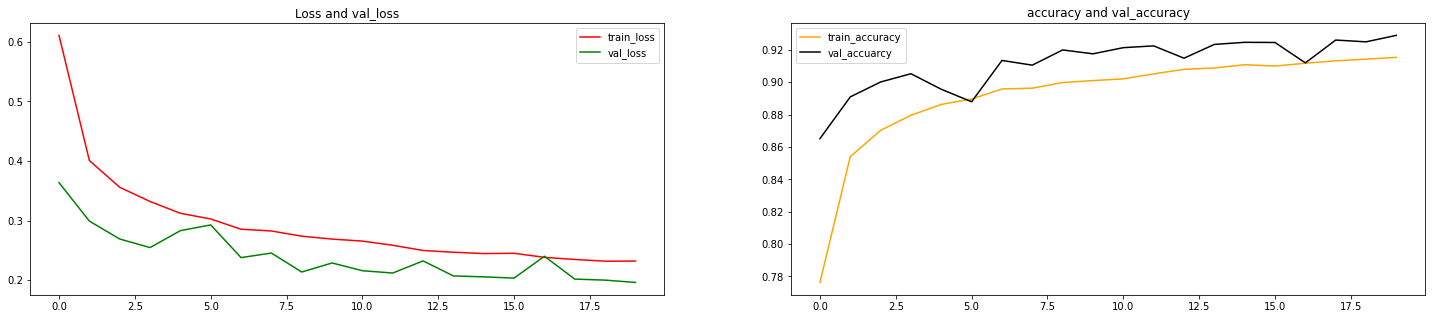

In [25]:
plot_function(history2)

### REFERENCE:
Karelia, M. (2022). Fashion MNIST. Retrieved from https://www.kaggle.com/code/mohitkarelia/fashion-mnist

Ustundag, E. (2022). Fashion MNIST, Deep Autoencoder. Retrieved from  https://www.kaggle.com/code/emreustundag/fashion-mnist-deep-autoencoder

https://www.tensorflow.org/guide/keras/custom_callback

Sarkar, T. (2022). Productive and Efficient Data Science with Python. Apress. 